In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

sys.path.append('../../.__python__/')
# kolmov exporter
from kolmov.core.kringer_df import kringer_df
from kolmov.core.kplot import kquadrant_pocket


In [2]:
basepath    = '/volume'
data18_path = os.path.join(basepath, 'Jpsi/data18_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97/data18_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97_et%i_eta%i.npz')

# tuning dictionary to be attached into pandas Dataframe
tuning_dict = {
    'v1'        : '/volume/v1_models_dict.pic.gz',
    'v1_nohad'  : '/volume/v1_nohad_models_dict.pic.gz'
}

In [3]:
et, eta = 2, 0
data18 = dict(np.load(data18_path %(et, eta)))
print(data18.keys())

dict_keys(['features', 'etBins', 'etaBins', 'etBinIdx', 'etaBinIdx', 'data', 'target'])


In [4]:
kringer  = kringer_df(data18)
kringer.add_tuning_decision(tuning_dict)

# now get the pandas to work
ringer_df = kringer.get_df()

In [5]:
cols_analysis = { 
    'l2_var'       : ['L2Calo_et',
                      'L2Calo_eta',
                      'L2Calo_phi',
                      'L2Calo_reta',
                      'L2Calo_eratio',
                      'L2Calo_f1'],

    'shower_shape' : ['avgmu',
                      'et',
                      'eta',
                      'phi',
                      'eratio',
                      'reta',
                      'rphi',
                      'f1',
                      'f3',
                      'rhad',
                      'rhad1',
                      'wtots1',
                      'weta1',
                      'weta2',
                      'e277',
                      'deltaE'],

    'el_id'        : ['el_lhtight',
                      'el_lhmedium',
                      'el_lhloose',
                      'el_lhvloose'],

    't2calo'        : ['T0HLTElectronT2CaloTight',
                       'T0HLTElectronT2CaloMedium',
                       'T0HLTElectronT2CaloLoose',
                       'T0HLTElectronT2CaloVLoose'],

    'tunings'       : ['v1',
                       'v1_nohad',
                       'target']
}
print(cols_analysis.keys())

dict_keys(['l2_var', 'shower_shape', 'el_id', 't2calo', 'tunings'])


In [6]:
shower_shape_df = ringer_df[(cols_analysis['shower_shape'] +\
                             cols_analysis['t2calo']       +\
                             cols_analysis['tunings'])].copy()
shower_shape_df.head()

,avgmu,et,eta,phi,eratio,reta,rphi,f1,f3,rhad,...,weta2,e277,deltaE,T0HLTElectronT2CaloTight,T0HLTElectronT2CaloMedium,T0HLTElectronT2CaloLoose,T0HLTElectronT2CaloVLoose,v1,v1_nohad,target
0,27.469999,11034.149414,0.417437,-2.548202,0.952266,1.022851,0.915003,0.528980,-0.000031,-0.003333,...,0.011526,4718.567871,4718.567871,1.0,1.0,1.0,1.0,1.0,1.0,1
1,27.430000,14200.937500,-0.305597,2.304199,1.000000,0.930242,1.004401,0.293302,0.006871,-0.008718,...,0.008437,10039.893555,10039.893555,1.0,1.0,1.0,1.0,1.0,1.0,1
2,27.044315,10887.302734,-0.068041,2.189435,0.953034,0.995752,0.986483,0.407384,0.002819,0.002063,...,0.010542,5776.427246,5776.427246,1.0,1.0,1.0,1.0,1.0,1.0,1
3,27.044315,15453.251953,-0.278528,2.062286,0.966205,0.911584,0.892798,0.522314,0.004748,0.002341,...,0.010449,7019.850098,7019.850098,1.0,1.0,1.0,1.0,1.0,1.0,1
4,26.740000,14244.715820,-0.005613,-2.852980,0.967012,0.876455,0.992065,0.421238,-0.000164,-0.025160,...,0.009408,8373.983398,8373.983398,1.0,1.0,1.0,1.0,1.0,1.0,1


In [7]:
# filters
sgn_condition      = (shower_shape_df.target == 1)
bkg_condition      = (shower_shape_df.target == 0)     
agree_condition    = (shower_shape_df.v1 == shower_shape_df.v1_nohad)
disagree_condition = (shower_shape_df.v1 != shower_shape_df.v1_nohad)
v1_acc_only        = (shower_shape_df.v1 == 1.) & (shower_shape_df.v1_nohad == 0.)
v1_nohad_acc_only  = (shower_shape_df.v1_nohad == 1.) & (shower_shape_df.v1 == 0.)

In [8]:
# v1
pd_v1 = (shower_shape_df[((sgn_condition) &\
                    (shower_shape_df.v1 == 1.))]['v1'].sum() / \
        len(shower_shape_df[sgn_condition]))

fa_v1 = (shower_shape_df[((bkg_condition) &\
                    (shower_shape_df.v1 == 1.))]['v1'].sum() /\
        len(shower_shape_df[bkg_condition]))

# v1_nohad
pd_v1_nohad = (shower_shape_df[((sgn_condition) &\
                          (shower_shape_df.v1_nohad == 1.))]['v1_nohad'].sum()/\
        len(shower_shape_df[sgn_condition]))

fa_v1_nohad = (shower_shape_df[((bkg_condition) &\
                          (shower_shape_df.v1_nohad == 1.))]['v1_nohad'].sum()/\
        len(shower_shape_df[bkg_condition]))

eff_df = pd.DataFrame(data={'pd'     : [pd_v1, pd_v1_nohad],
                            'fa'     : [fa_v1, fa_v1_nohad],
                            'tuning' : ['v1', 'v1_nohad']})
eff_df.set_index('tuning', inplace=True)
eff_df*100


,pd,fa
tuning,,
v1,97.134473,4.761375
v1_nohad,96.021060,6.105950


In [9]:
agree_rate = [
    (len(shower_shape_df[((sgn_condition) &\
                         (agree_condition))])\
    / \
    len(shower_shape_df[(sgn_condition)]))*100,
    (len(shower_shape_df[((bkg_condition) &\
                         (agree_condition))])\
    / \
    len(shower_shape_df[(bkg_condition)]))*100,
]

disagree_rate = [
    (len(shower_shape_df[((sgn_condition) &\
                         (disagree_condition))])\
    / \
    len(shower_shape_df[(sgn_condition)]))*100,
    (len(shower_shape_df[((bkg_condition) &\
                         (disagree_condition))])\
    / \
    len(shower_shape_df[(bkg_condition)]))*100,
]

type = ['signal', 'background']
rates = pd.DataFrame(data=np.array([agree_rate, disagree_rate]).T, columns=['agree_rate', 'disagree_rate'])

rates.index=type
rates.round(2)

,agree_rate,disagree_rate
signal,97.51,2.49
background,96.59,3.41


In [12]:
egam2_plot_config = {
    'avgmu'  : { 
        'var_name'    : r'$\langle \mu \rangle$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : sgn_condition,
        'title_tag1'  : 'v1',
        'title_tag2'  : r'v1_{noHAD}',
        'low_edge'    : -0.5,
        'high_edge'   : 60.5,
        'nbins'       : 62
    },

    'eratio' : {
        'var_name'    : r'$E_{ratio}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : sgn_condition,
        'title_tag1'  : 'v1',
        'title_tag2'  : r'v1_{noHAD}',
        'low_edge'    : 0.50,
        'high_edge'   : 1.05,
        'nbins'       : 100
    },
    
    'rhad'   : {
        'var_name'    : r'$R_{had}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : sgn_condition,
        'title_tag1'  : 'v1',
        'title_tag2'  : r'v1_{noHAD}',
        'low_edge'    : -.05,
        'high_edge'   : 0.05,
        'nbins'       : 200
    },

    'reta'   : {
        'var_name'    : r'$R_{\eta}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : sgn_condition,
        'title_tag1'  : 'v1',
        'title_tag2'  : r'v1_{noHAD}',
        'low_edge'    : 0.80,
        'high_edge'   : 1.10,
        'nbins'       : 200
    },

    'f1'     : {
        'var_name'    : r'$f_1$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : sgn_condition,
        'title_tag1'  : 'v1',
        'title_tag2'  : r'v1_{noHAD}',
        'low_edge'    : -.02,
        'high_edge'   : 0.7,
        'nbins'       : 100
    },

    'f3'     : {
        'var_name'    : r'$f_3$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : sgn_condition,
        'title_tag1'  : 'v1',
        'title_tag2'  : r'v1_{noHAD}',
        'low_edge'    : -.05,
        'high_edge'   : 0.15,
        'nbins'       : 200
    },

    'wtots1' : {
        'var_name'    : r'$w_{tots,1}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : sgn_condition,
        'title_tag1'  : 'v1',
        'title_tag2'  : r'v1_{noHAD}',
        'low_edge'    : 0.00,
        'high_edge'   : 8.00,
        'nbins'       : 100
    },

}

Plotting avgmu... 
Plotting eratio... 
Plotting rhad... 
Plotting reta... 
Plotting f1... 
Plotting f3... 
Plotting wtots1... 


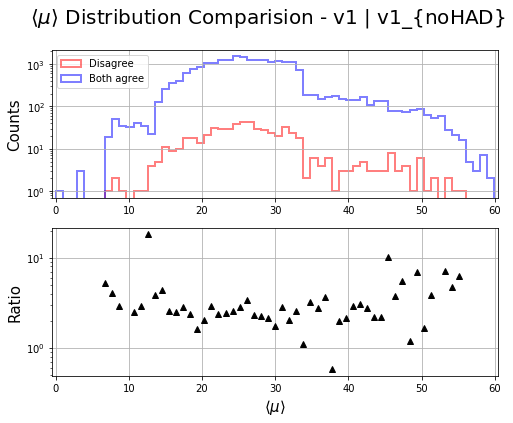

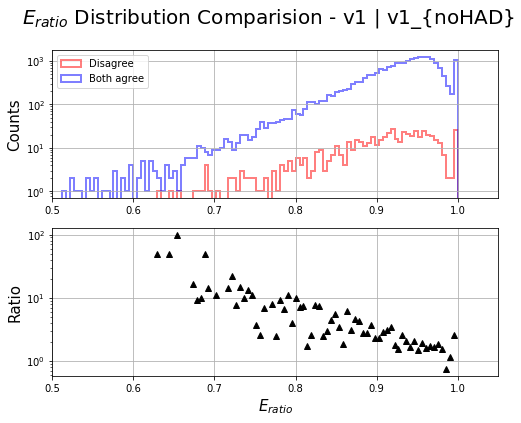

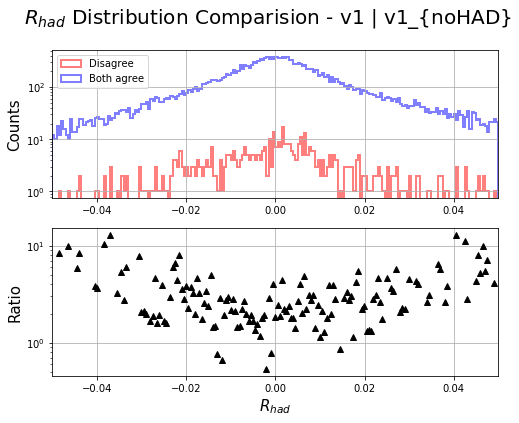

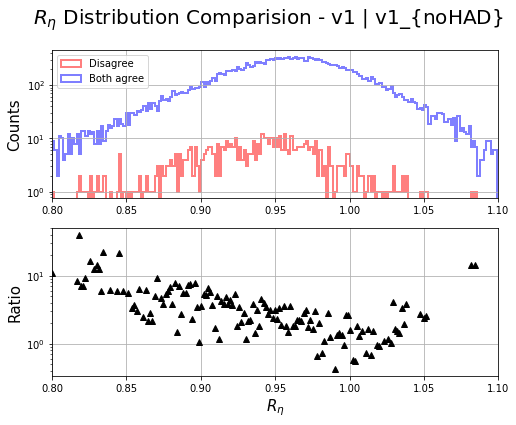

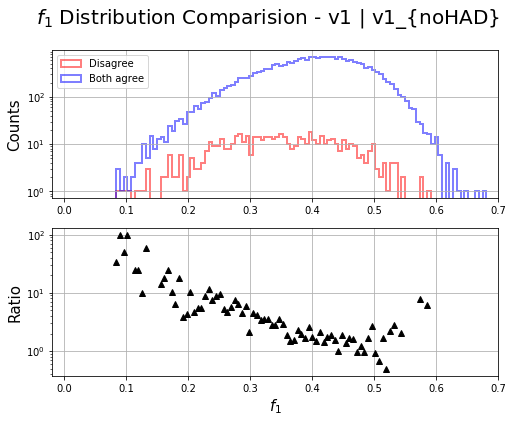

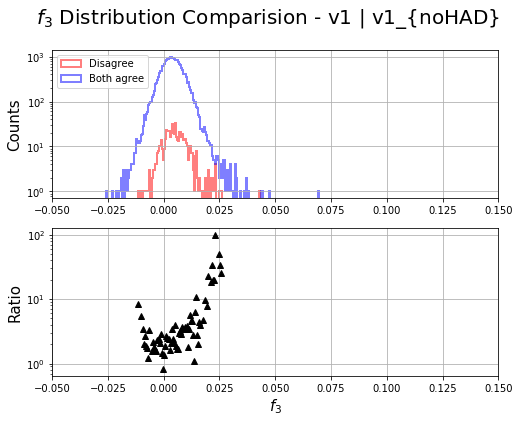

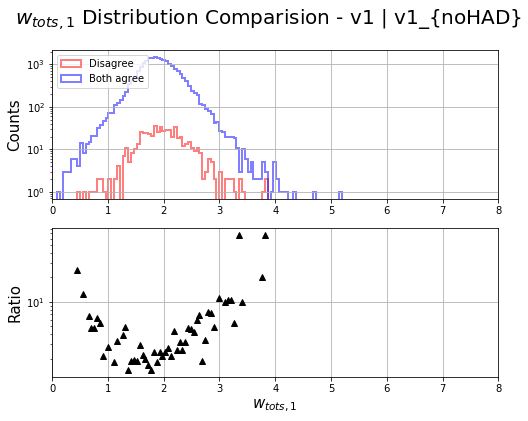

In [13]:
kquadrant_pocket(shower_shape_df, egam2_plot_config)


In [14]:
egam7_plot_config = {
    'avgmu'  : { 
        'var_name'    : r'$\langle \mu \rangle$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : bkg_condition,
        'title_tag1'  : 'v1',
        'title_tag2'  : r'v1_{noHAD}',
        'low_edge'    : -0.5,
        'high_edge'   : 60.5,
        'nbins'       : 62
    },

    'eratio' : {
        'var_name'    : r'$E_{ratio}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : bkg_condition,
        'title_tag1'  : 'v1',
        'title_tag2'  : r'v1_{noHAD}',
        'low_edge'    : 0.50,
        'high_edge'   : 1.05,
        'nbins'       : 100
    },
    
    'rhad'   : {
        'var_name'    : r'$R_{had}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : bkg_condition,
        'title_tag1'  : 'v1',
        'title_tag2'  : r'v1_{noHAD}',
        'low_edge'    : -.05,
        'high_edge'   : 0.05,
        'nbins'       : 200
    },

    'reta'   : {
        'var_name'    : r'$R_{\eta}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : bkg_condition,
        'title_tag1'  : 'v1',
        'title_tag2'  : r'v1_{noHAD}',
        'low_edge'    : 0.80,
        'high_edge'   : 1.10,
        'nbins'       : 200
    },

    'f1'     : {
        'var_name'    : r'$f_1$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : bkg_condition,
        'title_tag1'  : 'v1',
        'title_tag2'  : r'v1_{noHAD}',
        'low_edge'    : -.02,
        'high_edge'   : 0.7,
        'nbins'       : 100
    },

    'f3'     : {
        'var_name'    : r'$f_3$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : bkg_condition,
        'title_tag1'  : 'v1',
        'title_tag2'  : r'v1_{noHAD}',
        'low_edge'    : -.05,
        'high_edge'   : 0.15,
        'nbins'       : 200
    },

    'wtots1' : {
        'var_name'    : r'$w_{tots,1}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : bkg_condition,
        'title_tag1'  : 'v1',
        'title_tag2'  : r'v1_{noHAD}',
        'low_edge'    : 0.00,
        'high_edge'   : 8.00,
        'nbins'       : 100
    },

}

Plotting avgmu... 
Plotting eratio... 
Plotting rhad... 
Plotting reta... 
Plotting f1... 
Plotting f3... 
Plotting wtots1... 


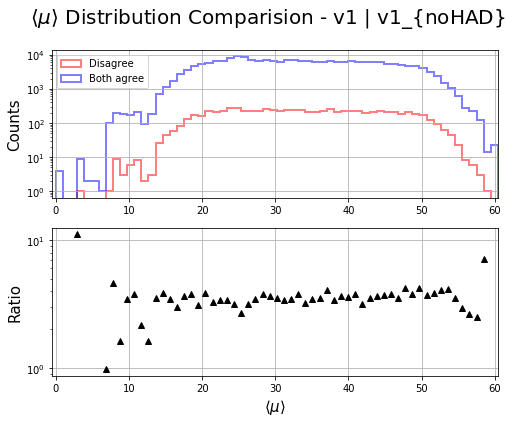

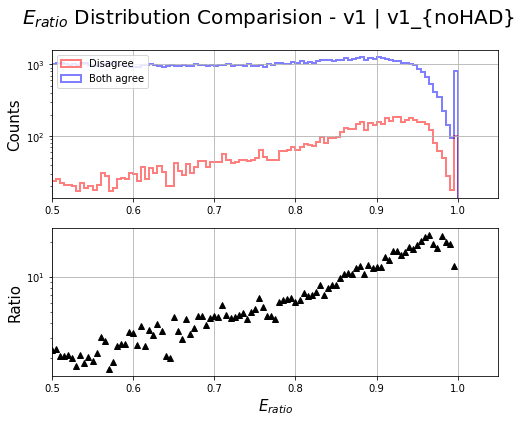

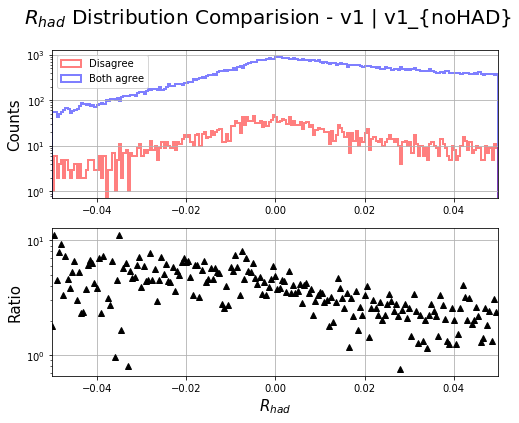

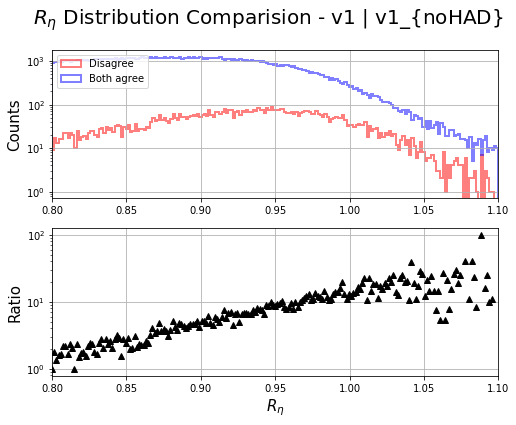

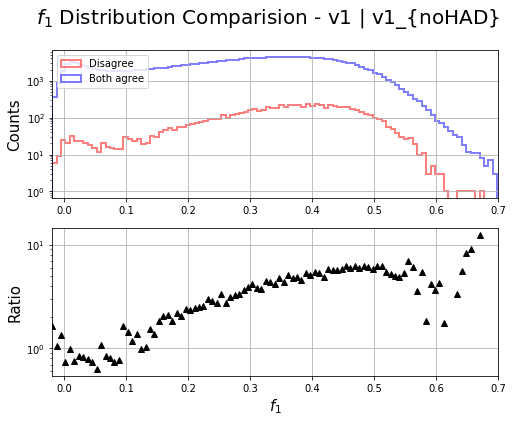

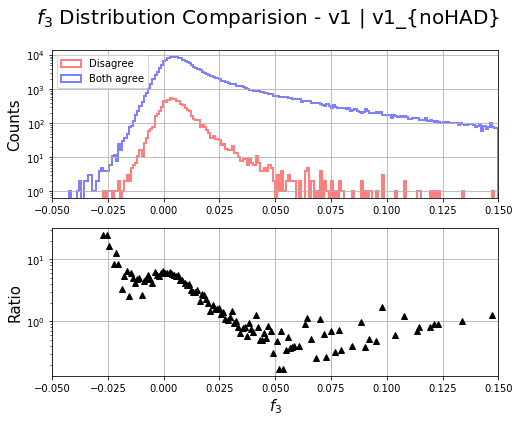

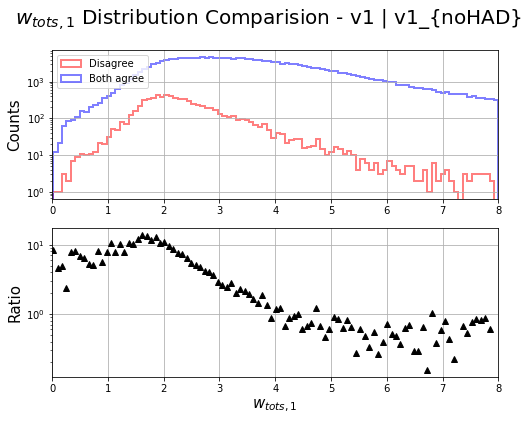

In [15]:
kquadrant_pocket(shower_shape_df, egam7_plot_config, '/volume/mini_quad_data18_egam7')

In [20]:
len(shower_shape_df[bkg_condition & disagree_condition])

7971

In [19]:
shower_shape_df.groupby(['target', 'v1', 'v1_nohad'])['v1_nohad'].count().to_frame('Contagem')

Contagem
target v1  v1_nohad          
0      0.0 0.0         217208
           1.0           5558
       1.0 0.0           2413
           1.0           8724
1      0.0 0.0            505
           1.0            159
       1.0 0.0            417
           1.0          22091